<a href="https://colab.research.google.com/github/maryclareok/3classesfireandsmoke/blob/main/sosesworkmay2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install --upgrade tensorflow


This script is performing several steps of a machine learning workflow, including data loading, preprocessing, model training, and prediction. Here's a breakdown:

1. **Data Loading**: The script starts by defining the path to the directory where the data files are stored (`dir_path`), and the subdirectories within that directory (`sub_dirs`). It then initializes an empty list (`dfs`) to store the dataframes. The script loops over each subdirectory, and for each .csv file in the subdirectory, it reads the file into a pandas DataFrame and appends it to the list. After all files have been read, it concatenates the dataframes into a single dataframe (`df`).

2. **Data Preprocessing**: The script defines the features to be used for clustering (`features`). It then converts non-numeric values in these features to NaN, and drops the rows with NaN values. After that, it scales the features using `StandardScaler` from sklearn, which standardizes the features to have zero mean and unit variance.

3. **Model Definition and Training**: The script defines an autoencoder model using Keras. An autoencoder is a type of neural network used for learning efficient codings of input data. It consists of an encoder, which learns a compressed representation of the input data, and a decoder, which learns to reconstruct the original data from the compressed representation. The script defines the size of the compressed representation (`encoding_dim`), the input layer (`input_data`), the encoded layer (`encoded`), and the decoded layer (`decoded`). It then defines the autoencoder model (`autoencoder`), compiles it with the Adadelta optimizer and binary crossentropy loss, and trains it on the scaled features.

4. **Dimensionality Reduction**: The script uses the encoder part of the autoencoder to reduce the dimensionality of the data (`X_encoded`).

5. **Clustering**: The script creates a KMeans object (`kmeans`) with a specified number of clusters, fits it to the encoded data, and assigns each data point to a cluster (`df['cluster']`).

So, in summary, this script is loading data from multiple .csv files, preprocessing the data, training an autoencoder model, using the model to reduce the dimensionality of the data, and applying KMeans clustering to the reduced data.

In [ ]:
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from keras.models import Model

# Define the path to the directory
dir_path = '/content/drive/MyDrive/5G-production-dataset'  # replace with your directory path

# Define the subdirectories
sub_dirs = ['Download', 'Netflix', 'Amazon_Prime']

# Define the features for clustering
features = ['Longitude', 'Latitude', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate']

# Initialize a list to store dataframes
dfs = []

# Loop through each subdirectory
for sub_dir in sub_dirs:
    # Get the list of .csv files in each subdirectory
    csv_files = [f for f in os.listdir(os.path.join(dir_path, sub_dir)) if f.endswith('.csv')]

    # Loop through each .csv file
    for file in csv_files:
        # Read the .csv file into a pandas DataFrame
        df = pd.read_csv(os.path.join(dir_path, sub_dir, file))

        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)

# Convert non-numeric values to NaN
for feature in features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

# Drop the rows with NaN values. Alternatively, you can fill NaN values with a valid numeric value.
df = df.dropna()

# Preprocess the data (e.g., normalization)
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Define the size of the encoded representations
encoding_dim = 32  # this is the size of our encoded representations

# Define the input layer
input_data = Input(shape=(len(features),))

# Define the encoded layer
encoded = Dense(encoding_dim, activation='relu')(input_data)

# Define the decoded layer
decoded = Dense(len(features), activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_data, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Train the autoencoder model
history = autoencoder.fit(X, X, epochs=40, batch_size=256, shuffle=True)

# Use the encoder part of the autoencoder to reduce the dimensionality of the data
encoder = Model(input_data, encoded)
X_encoded = encoder.predict(X)

# Create a KMeans object
kmeans = KMeans(n_clusters=3)  # You can change the number of clusters

# Fit the model to the encoded data
kmeans.fit(X_encoded)

# Get the cluster assignments for each data point
df['cluster'] = kmeans.labels_


Epoch 1/40
519/519 [==============================] - 2s 2ms/step - loss: 0.7441
Epoch 2/40
519/519 [==============================] - 1s 2ms/step - loss: 0.7355
Epoch 3/40
519/519 [==============================] - 1s 2ms/step - loss: 0.7255
Epoch 4/40
519/519 [==============================] - 1s 2ms/step - loss: 0.7144
Epoch 5/40
519/519 [==============================] - 1s 2ms/step - loss: 0.7024
Epoch 6/40
519/519 [==============================] - 1s 2ms/step - loss: 0.6898
Epoch 7/40
519/519 [==============================] - 1s 2ms/step - loss: 0.6768
Epoch 8/40
519/519 [==============================] - 1s 2ms/step - loss: 0.6632
Epoch 9/40
519/519 [==============================] - 1s 2ms/step - loss: 0.6494
Epoch 10/40
519/519 [==============================] - 1s 2ms/step - loss: 0.6352
Epoch 11/40
519/519 [==============================] - 1s 2ms/step - loss: 0.6208
Epoch 12/40
519/519 [==============================] - 1s 2ms/step - loss: 0.6061
Epoch 13/40
519/519 [====

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#silhouette score

The Silhouette Score is a measure of how well each datapoint \(x_i\) lies within its assigned cluster. It ranges from -1 to 1, where a higher value indicates that the datapoint is well matched to its own cluster and poorly matched to neighboring clusters.

In the context of your project, a Silhouette Score of 0.14146705 suggests that the datapoints (in this case, the base stations) are, on average, not very densely packed in their assigned clusters. This could mean that there might be some overlap between the clusters, or that the datapoints within each cluster are spread out.

Here's a general guideline for interpreting the Silhouette Score:

- Values close to 1 suggest that the datapoints are well clustered.
- Values close to 0 suggest that the datapoints are on or very close to the decision boundary between two neighboring clusters.
- Negative values suggest that those datapoints might have been assigned to the wrong cluster.

So, in your case, a Silhouette Score of 0.14146705 suggests that there might be room for improving the clustering, perhaps by using a different number of clusters, using a different clustering algorithm, or by preprocessing the data differently.

In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette = silhouette_score(X_encoded, df['cluster'])

print('Silhouette Score:', silhouette)


Silhouette Score: 0.14146705


#SAVE MODEL
This code is saving the trained models to disk so that they can be loaded and used later without needing to be retrained. Here’s a breakdown of what each line is doing:

autoencoder.save('/content/drive/MyDrive/autoencoder_model.h5'): This line is saving the trained autoencoder model to a file named ‘autoencoder_model.h5’ in the directory ‘/content/drive/MyDrive’. The ‘.h5’ extension indicates that the model is being saved in the HDF5 format, which is a common format for storing large amounts of numerical data like the weights of a neural network.
encoder.save('/content/drive/MyDrive/encoder_model.h5'): This line is saving the trained encoder model (which is part of the autoencoder) to a file named ‘encoder_model.h5’ in the same directory. Again, the model is being saved in the HDF5 format.
import pickle: This line is importing the ‘pickle’ module, which is a Python module used for serializing (i.e., converting to a byte stream) and deserializing Python objects.
with open('/content/drive/MyDrive/kmeans_model.pkl', 'wb') as f:: This line is opening a file named ‘kmeans_model.pkl’ in the directory ‘/content/drive/MyDrive’ in binary write mode (‘wb’). The ‘.pkl’ extension indicates that the file is a pickle file, which is a common format for serializing Python objects.
pickle.dump(kmeans, f): This line is using the ‘dump’ function from the ‘pickle’ module to serialize the trained KMeans model and write it to the file.
So, in summary, this code is saving the trained autoencoder, encoder, and KMeans models to disk so that they can be loaded and used later without needing to be retrained.


In [ ]:
# Save the trained models
autoencoder.save('/content/drive/MyDrive/autoencoder_model.h5')
encoder.save('/content/drive/MyDrive/encoder_model.h5')

# Save the KMeans model
import pickle
with open('/content/drive/MyDrive/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Group the data by cluster and calculate the mean of the features
This code is calculating the mean (average) values of the features for each cluster and printing them out. These mean values can be considered as the “centers” of the clusters in the feature space.

Here’s a breakdown of what each line is doing:

cluster_centers = df.groupby('cluster')[features].mean(): This line is grouping the DataFrame df by the ‘cluster’ column, selecting the columns specified in features, and calculating the mean of these columns for each cluster. The result is a new DataFrame where the index is the cluster number and the columns are the mean values of the features for each cluster.
print(cluster_centers): This line is printing the cluster_centers DataFrame. Each row in this DataFrame corresponds to a cluster, and the values in the row are the mean values of the features for that cluster.
So, in summary, this code is providing a summary of each cluster by calculating and printing the mean values of the features for each cluster. This can help you understand the characteristics of each cluster.

In [ ]:
# Group the data by cluster and calculate the mean of the features
cluster_centers = df.groupby('cluster')[features].mean()

# Print the cluster centers
print(cluster_centers)


         Longitude   Latitude       RSRP       RSRQ       SNR        CQI  \
cluster                                                                    
0        -8.396502  51.888305 -100.01366 -13.601577  2.106491  11.107586   
1        -8.408463  51.891683  -93.17510 -13.556310  3.883061  10.872724   
2        -8.452683  51.908599  -85.50602 -11.596329  4.300977  10.675992   

              RSSI     DL_bitrate  UL_bitrate  
cluster                                        
0       -91.192888   10491.429138   52.421473  
1       -94.179883  175625.185282  339.300987  
2       -72.937399    3873.422069   33.322850  


# Get the base stations in each cluster
This code is iterating over each cluster created by the KMeans algorithm and printing out the base stations (represented by ‘CellID’) that belong to each cluster.

Here’s a breakdown of what each line is doing:

for i in range(kmeans.n_clusters): This line is starting a loop that will iterate over each cluster. The number of clusters is determined by the n_clusters attribute of the kmeans object.
print(f"Cluster {i}:") This line is printing the cluster number for each iteration. The {i} inside the string will be replaced by the current cluster number.
print(df[df['cluster'] == i]['CellID']) This line is printing the ‘CellID’ of the base stations that belong to the current cluster. It does this by subsetting the DataFrame df to only include rows where the ‘cluster’ column is equal to the current cluster number i, and then selecting the ‘CellID’ column.
So, in summary, this code is printing out the base stations that belong to each cluster, which can help you understand how the base stations are grouped based on the KMeans clustering algorithm.

In [ ]:
# Get the base stations in each cluster
for i in range(kmeans.n_clusters):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['CellID'])


Cluster 0:
0          11
1          11
2          11
3          11
4          11
         ... 
185879     11
185881     11
185926     11
185927     11
185928    121
Name: CellID, Length: 36529, dtype: int64
Cluster 1:
12        11
13        11
14        11
15        11
16        11
          ..
185611    12
185612    12
185613    12
185614    12
185815    12
Name: CellID, Length: 6482, dtype: int64
Cluster 2:
2143      12
2144      12
2145      12
2146      12
2147      12
          ..
185921    11
185922    11
185923    11
185924    11
185925    11
Name: CellID, Length: 89791, dtype: int64


#GMM
The choice between using KMeans or Gaussian Mixture Models (GMM) depends on the specific requirements of your project and the nature of your data.

**KMeans** is a simple and fast algorithm that works well when the clusters are spherical and roughly the same size. It assigns each data point to exactly one cluster, which makes it easy to interpret the results. However, KMeans assumes that clusters are spherical and have similar variances, which might not always be the case.

On the other hand, **GMM** is a more flexible method that allows for mixed membership of points to clusters. In GMM, a point belongs to each cluster to a different degree, based on the probability of the point being generated from each cluster's Gaussian distribution. This makes GMM more capable of handling clusters of different shapes and sizes. However, GMM is more computationally intensive than KMeans and might be harder to interpret due to the mixed membership of points to clusters.

In your case, we started with KMeans because it's a simple and commonly used algorithm that serves as a good starting point. After applying KMeans, we used the Silhouette Score to evaluate the quality of the clusters. The Silhouette Score suggested that there might be some overlap between the clusters, which is why we considered using GMM to find the overlapping regions.

Using GMM at this point allows us to take advantage of its ability to handle overlapping clusters, which might provide more insights into your data. However, whether to use KMeans, GMM, or any other clustering algorithm should be decided based on your specific requirements and the nature of your data.


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(X_encoded)

# Get the cluster assignments for each data point
df['cluster'] = gmm.predict(X_encoded)

# Get the probabilities of each data point belonging to each cluster
probs = gmm.predict_proba(X_encoded)


#PROBABILITY OF EACH BASE STATION BEING OVERLAPPED BY ANOTHER CLUSTER
The output you're seeing is a DataFrame that represents the probabilities of each data point (or row in your original dataset) belonging to each cluster.

- The columns `Cluster 0`, `Cluster 1`, and `Cluster 2` represent the three clusters that your data points have been grouped into by the Gaussian Mixture Model (GMM).
- The values in these columns are the probabilities that a given data point belongs to that cluster. For example, a value of `1.000000e+00` in `Cluster 0` for a particular row means that the GMM model is almost certain (with a probability of 1) that this data point belongs to `Cluster 0`.
- The `CellID` column is just the `CellID` from your original dataset. It's included in this DataFrame for reference, so you can see which cell each row of probabilities corresponds to.

The code  posted calculates these probabilities using the `predict_proba` method of the GMM, which returns the probability of each sample belonging to each cluster. It then filters the DataFrame to only include rows where more than one cluster has a probability greater than a certain threshold (0.5 in your case), indicating that these base stations could potentially belong to more than one cluster.

Please note that the probabilities are in scientific notation. For example, `1.000000e+00` is equivalent to 1, `3.566801e-67` is a very small number close to 0, and `5.992325e-168` is even closer to 0. .

In [ ]:
# Get the probabilities of each data point belonging to each cluster
probs = gmm.predict_proba(X_encoded)

# Convert the probabilities to a DataFrame
probs_df = pd.DataFrame(probs, columns=[f'Cluster {i}' for i in range(kmeans.n_clusters)])

# Add the 'CellID' column to the probabilities DataFrame
probs_df['CellID'] = df['CellID']

# Set a threshold for the minimum probability to consider a base station as part of a cluster
threshold = 0.5  # You can adjust this value based on your requirements

# Find the base stations that have a probability greater than the threshold for more than one cluster
overlapping_base_stations = probs_df[probs_df.gt(threshold).sum(axis=1) > 1]

print(overlapping_base_stations)


        Cluster 0     Cluster 1  Cluster 2  CellID
0             1.0  3.614687e-22        0.0    11.0
1             1.0  2.905381e-13        0.0    11.0
2             1.0  3.724265e-13        0.0    11.0
3             1.0  3.724265e-13        0.0    11.0
4             1.0  2.231831e-20        0.0    11.0
...           ...           ...        ...     ...
132797        0.0  1.000000e+00        0.0    11.0
132798        0.0  1.000000e+00        0.0    11.0
132799        0.0  1.000000e+00        0.0    11.0
132800        0.0  1.000000e+00        0.0    11.0
132801        0.0  1.000000e+00        0.0    11.0

[102377 rows x 4 columns]


In summary: for the base station 11 it belongs to cluster 0 because it has a probabilty of 1 , and its getting less interference from cluster 1 and cluster 2


#Plotting the Training Loss of the Autoencoder

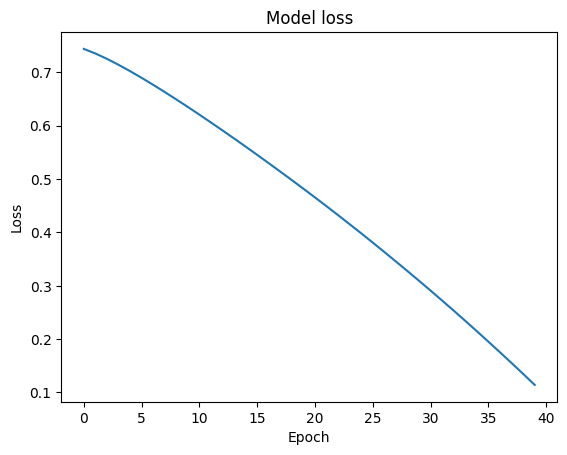

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of the fit function
# history = autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


#Silhouette Score for Different Numbers of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

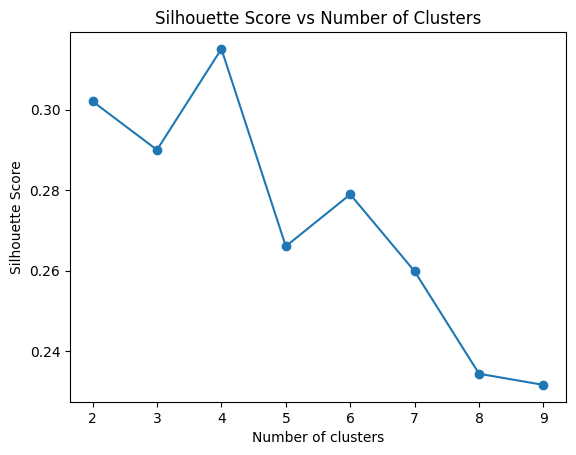

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

silhouette_scores = []
cluster_range = range(2, 10)  # Adjust based on your requirements
sample_size = 10000  # Adjust based on your requirements

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_encoded)

    # Create a random sample of the data
    sample_indices = np.random.choice(np.arange(X_encoded.shape[0]), size=sample_size, replace=False)
    X_sample = X_encoded[sample_indices]
    labels_sample = kmeans.labels_[sample_indices]

    silhouette_scores.append(silhouette_score(X_sample, labels_sample, n_jobs=-1))

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

#Bar Plot of Cluster Centers

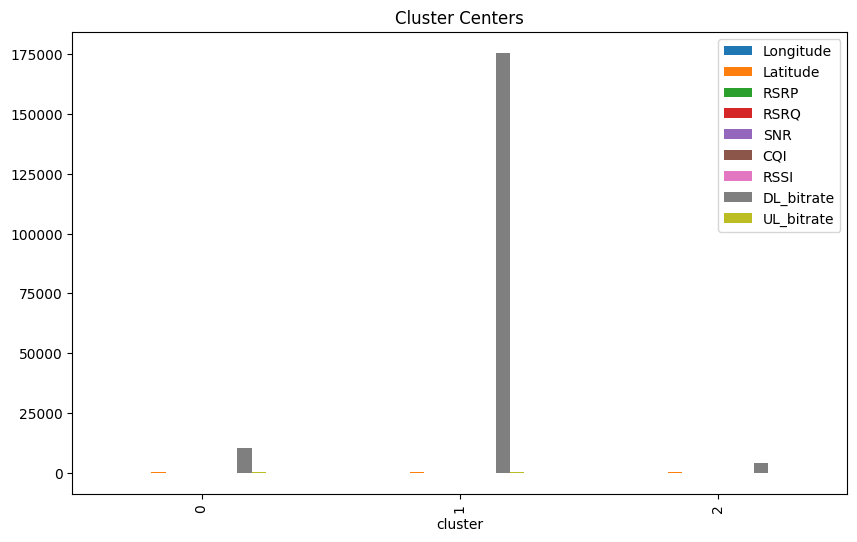

In [ ]:
# Assuming 'cluster_centers' is a DataFrame containing the mean values of the features for each cluster
# cluster_centers = df.groupby('cluster')[features].mean()

cluster_centers.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centers')
plt.show()


1. **Silhouette Score**: This is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette scores range from -1 to 1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

2. **Davies-Bouldin Index**: This is a metric for evaluating clustering algorithms. This index signifies the average 'similarity' between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. Zero is the lowest possible score. Values closer to zero indicate a better partition.

3. **Calinski-Harabasz Index**: Also known as the Variance Ratio Criterion, it is used to evaluate the model where algorithms cluster assigns the data point to clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

4. **Inertia**: It tells us the sum of squared distances of samples to their closest cluster center. We always want to minimize the inertia. The lesser the inertia value, the better our clusters.

5. **Scatter Plot**: This is a graphical representation where each observation is represented as points in a two-dimensional space. The two dimensions are two numerical variables. In the context of clustering, a scatter plot can be used to visualize the clusters in two-dimensional space.


7. **Heatmap of the Distance Matrix**: A heatmap allows you to visualize matrix-like data in the form of colored cells. In the context of clustering, a heatmap of the distance matrix can be used to visualize the distances between data points.

8. **Parallel Coordinates Plot**: This is a type of visualization for multivariate data. Each observation is represented by a polyline that traverses across a set of parallel axes corresponding to the variables. In the context of clustering, a parallel coordinates plot can be used to visualize the clusters in multivariate data.



#Part 1: Calculate and print metrics

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Calculate metrics
davies_bouldin = davies_bouldin_score(X_encoded, df['cluster'])
calinski_harabasz = calinski_harabasz_score(X_encoded, df['cluster'])
inertia = kmeans.inertia_

# Print metrics
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Inertia: {inertia}')


Davies-Bouldin Index: 2.2263983521390585
Calinski-Harabasz Index: 23107.01601669339
Inertia: 525488.625


#Part 2: Scatter plot

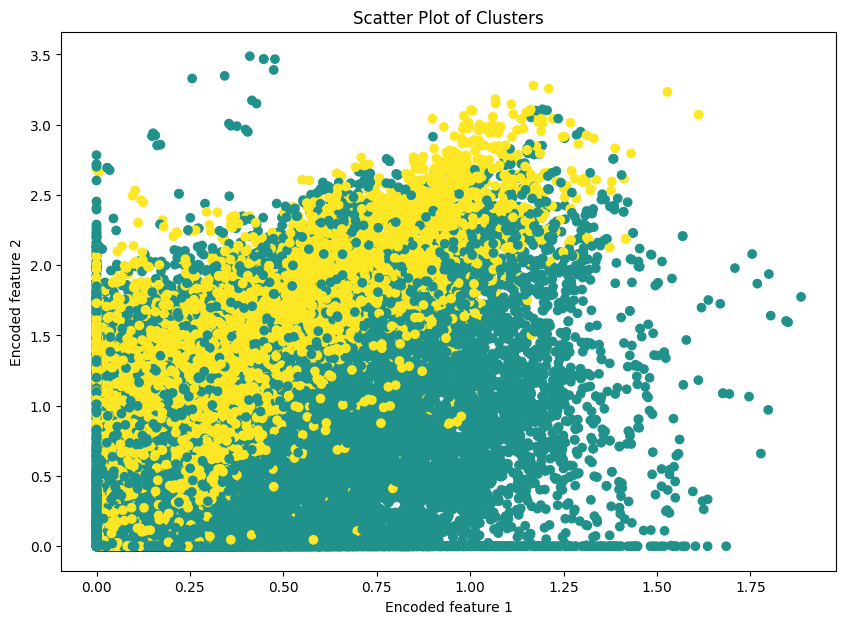

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=df['cluster'])
plt.xlabel('Encoded feature 1')  # Replace with your actual feature name
plt.ylabel('Encoded feature 2')  # Replace with your actual feature name
plt.title('Scatter Plot of Clusters')
plt.show()


#Part 4: Heatmap of distance matrix

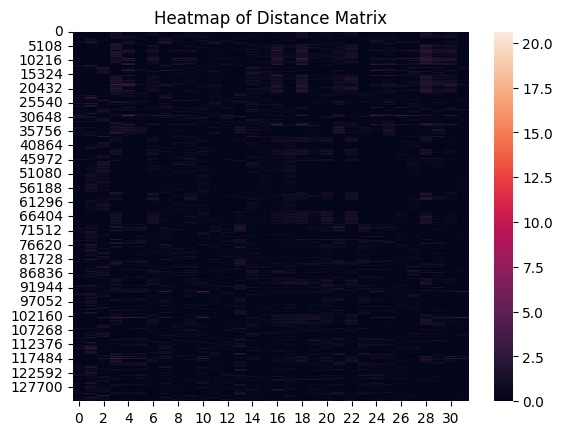

In [ ]:
import seaborn as sns

sns.heatmap(X_encoded)
plt.title('Heatmap of Distance Matrix')
plt.show()


#Part 5: Parallel coordinates plot

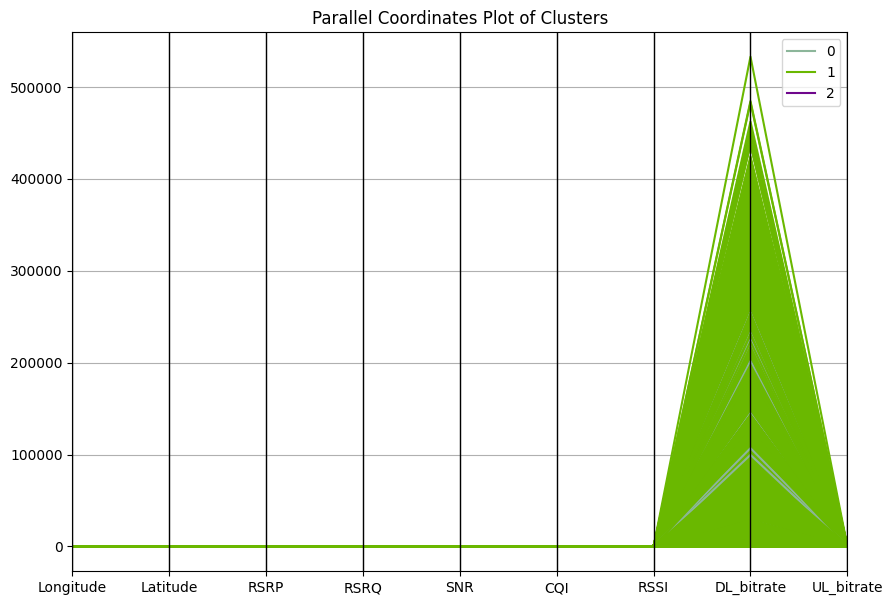

In [ ]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10, 7))
parallel_coordinates(df[features + ['cluster']], 'cluster')
plt.title('Parallel Coordinates Plot of Clusters')
plt.show()


#Part 6: Bar plot of metrics

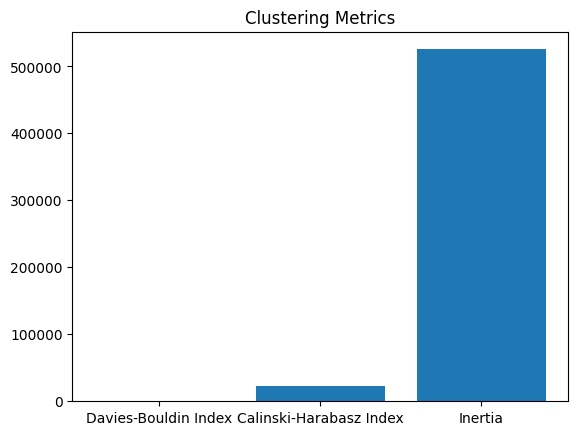

In [ ]:
metrics = {'Davies-Bouldin Index': davies_bouldin, 'Calinski-Harabasz Index': calinski_harabasz, 'Inertia': inertia}
plt.bar(metrics.keys(), metrics.values())
plt.title('Clustering Metrics')
plt.show()


#Box Plot: A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. You can create a box plot for each feature in your dataset, split by cluster.

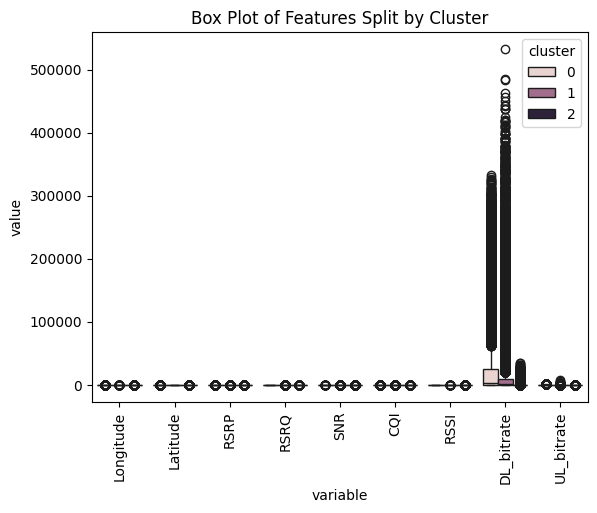

In [ ]:
# Melt the DataFrame into a format suitable for a box plot
melted_df = pd.melt(df.reset_index(), id_vars=['cluster'], value_vars=features)

# Create the box plot
sns.boxplot(x='variable', y='value', hue='cluster', data=melted_df)
plt.title('Box Plot of Features Split by Cluster')
plt.xticks(rotation=90)
plt.show()


# 3D Scatter Plot

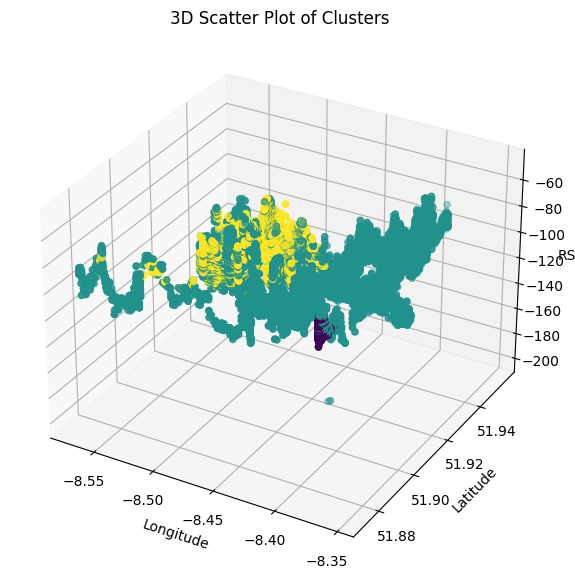

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'Longitude', 'Latitude', and 'RSRP' are the names of the features you want to plot
ax.scatter(df['Longitude'], df['Latitude'], df['RSRP'], c=df['cluster'])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('RSRP')

plt.title('3D Scatter Plot of Clusters')
plt.show()


# Radial Visualization (Spider/Radar Chart): A radar chart is a graphical method of displaying multivariate data in the form of a two-dimensional chart of three or more quantitative variables represented on axes starting from the same point. Here’s

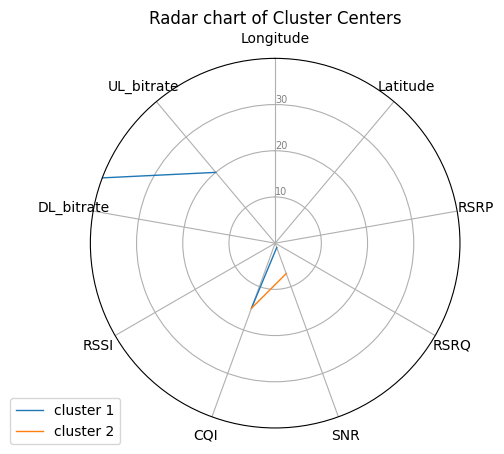

In [ ]:
from math import pi

# Number of variables
num_vars = len(features)

# Compute angle each axis will occupy
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Ensure circularity

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], features)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
plt.ylim(0, 40)

# Ind1
values = df.loc[0, features].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster 1")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values = df.loc[1, features].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster 2")
ax.fill(angles, values, 'r', alpha=0.1)

plt.title('Radar chart of Cluster Centers')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
